In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score,
                             roc_auc_score)
%matplotlib inline

In [14]:
CSV_PATH = './opfd/onlinefraud.csv'
df = pd.read_csv(CSV_PATH)
print('sample shape:', df_sample.shape)
print('columns', df_sample.columns.tolist())
display(df.head())

sample shape: (5000, 11)
columns ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [15]:
target_col = 'isFraud'
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features = [c for c in numeric_cols if c != target_col]
print("Numeric features being used:", numeric_features)
X = df[numeric_features]
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#decisiontreeclassifier
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

Numeric features being used: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']


Confusion Matrix:
 [[1270662     219]
 [    274    1369]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.86      0.83      0.85      1643

    accuracy                           1.00   1272524
   macro avg       0.93      0.92      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524

ROC AUC: 0.9165
Top Feature Importances:
 newbalanceOrig    0.408842
oldbalanceOrg     0.374589
amount            0.172696
step              0.036625
newbalanceDest    0.004688
oldbalanceDest    0.001650
isFlaggedFraud    0.000911
dtype: float64


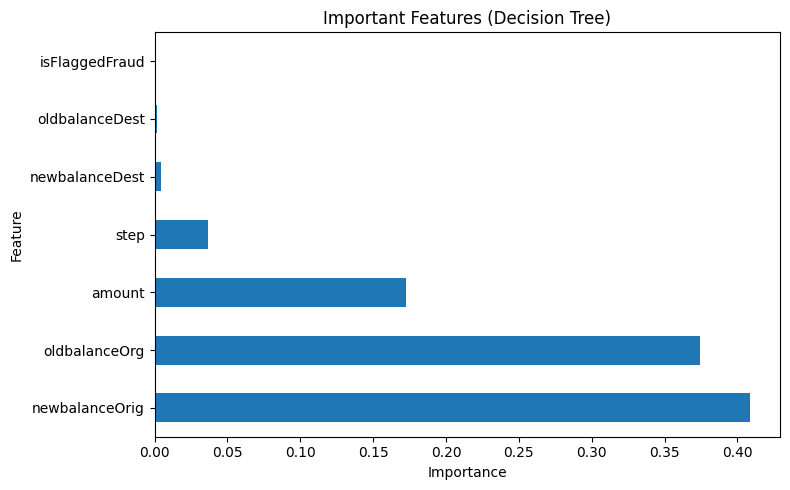

In [18]:
# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", round(roc_auc_score(y_test, y_pred), 4))

importances = pd.Series(dt.feature_importances_, index=numeric_features).sort_values(ascending=False)
print("Top Feature Importances:\n", importances.head(10))

#what are the important factors,features
plt.figure(figsize=(8,5))
importances.head(10).plot(kind='barh')
plt.title("Important Features (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()